# **<center><b>Caso Titanic - ARN Classification</b></center>**

##<h2><b>1. Preparacion del Modelo</b></h2>

### <center><h2><b>1.1. Montar Titanic Dataset</b></h2></center>

In [ ]:
# Mount local files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###<h2><b>1.2. Importar Librerias Python</b></h2>

In [ ]:
# Import Titabic Dataset
from load_titanic_dataset import load_titanic

# Import sckit-learn ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    r2_score
)
# Import tensorflow ml libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Import Confussion Maxtrix libraries
import seaborn as sns
import matplotlib.pyplot as plt

### <h2><b>1.3. Cargar la data de Titanic</b></h2>


In [ ]:
# Load Titanic dataset
dataset = load_titanic('/content/titanic.csv')
X = dataset.data
y = dataset.target

##<h2><b>2. Entrenamiento del modelo</b></h2>

### <h2><b>2.1. Divisón entre Test y Training Data</b></h2>

In [ ]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <h2><b>2.2. Definir Hyperparametros</b></h2>

In [ ]:
# Normalize scalability on each X feature
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 712 samples
Test set size: 179 samples


In [ ]:
# Create and Train RNN model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=9))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

opt = Adam(learning_rate = 1e-2) # by default lr=1e-3
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

### <h2><b>2.3. Definición de Paradas Tempranas</b></h2>

In [ ]:
# Configure early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5001 - loss: 0.7108 - val_accuracy: 0.6369 - val_loss: 0.6050
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7121 - loss: 0.5734 - val_accuracy: 0.7486 - val_loss: 0.5453
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7849 - loss: 0.5271 - val_accuracy: 0.7765 - val_loss: 0.5042
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7904 - loss: 0.5099 - val_accuracy: 0.7765 - val_loss: 0.4804
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7987 - loss: 0.4676 - val_accuracy: 0.7765 - val_loss: 0.4742
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7678 - loss: 0.4969 - val_accuracy: 0.7877 - val_loss: 0.4784
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8205 - loss: 0.4462 - val_accuracy: 0.7709 - val_loss: 0.4797
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.4831 - val_accuracy: 0.7933 - 

### <h2><b>2.4. Realización de Predicciones</b></h2>

In [ ]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

# Convierte las salidas en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


##<h2><b>3. Grafica de entrenamiento</b></h2>

### <h2><b>3.1. Gráfico Matriz de Confusión</b></h2>


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.62      0.71        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

Confusion Matrix:
 [[95 10]
 [28 46]]


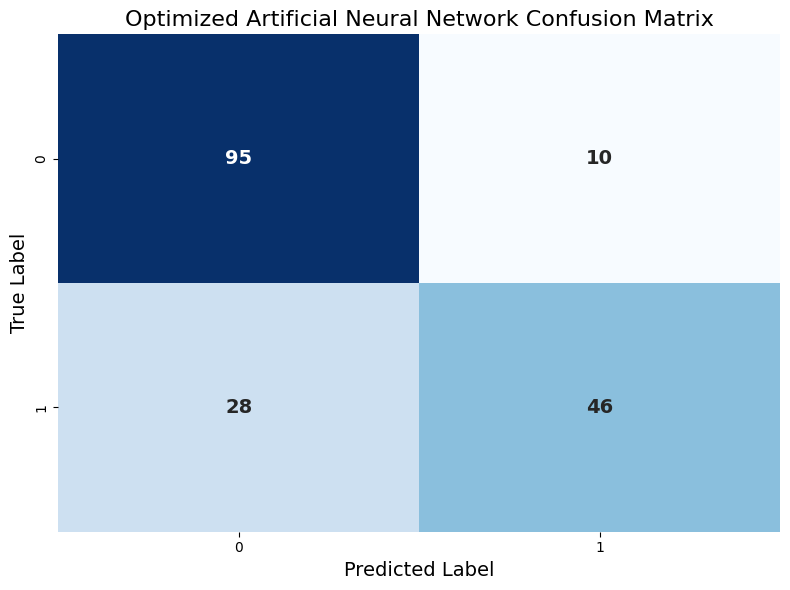

In [ ]:
# Evaluation report
print("\nClassification Report:")
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heat Map Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Optimized Artificial Neural Network Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png', dpi=300)
plt.show()

### <h2><b>3.2. Gráfico Curva ROC</b></h2>

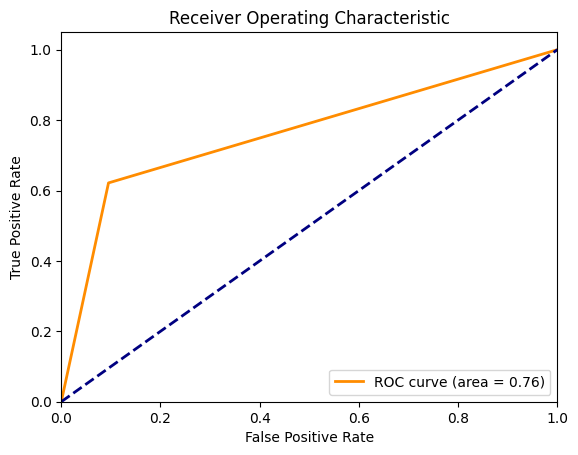

In [ ]:
# Curva ROC
auc = roc_auc_score(y_test, y_pred)
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### <h2><b>3.3. Gráfico Crossentropy</b></h2>

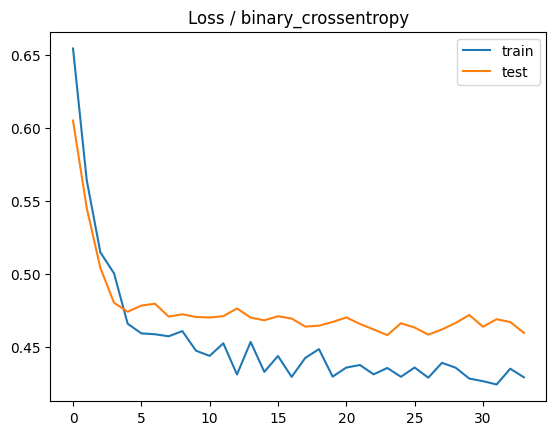

In [ ]:
# plot loss during training
plt.title('Loss / binary_crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### <h2><b>3.4. Gráfico Accuracy</b></h2>

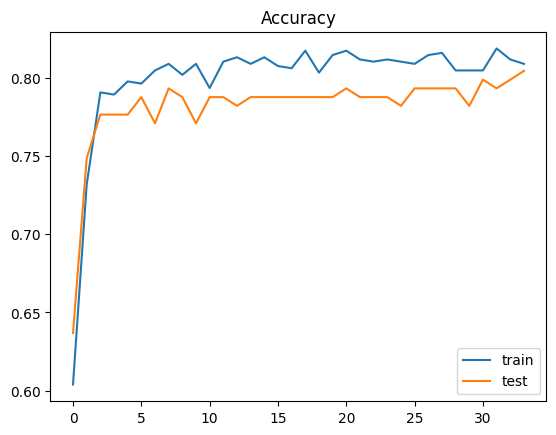

In [ ]:
# plot accuracy during training
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## <h2><b>4. Evaluación Métricas</b></h2>

In [ ]:
# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Specificity": recall_score(y_test, y_pred, pos_label=0),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC Score": roc_auc_score(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

print("\nOptimized Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


Optimized Model Metrics:
Accuracy: 0.7877
Recall (Sensitivity): 0.6216
Precision: 0.8214
Specificity: 0.9048
F1 Score: 0.7077
ROC AUC Score: 0.7632
R2 Score: 0.1246


## <h2><b>5. Guardado del modelo entrenado</b></h2>

In [ ]:
# Loading RNN model
model.save('RNA_model_Titanic.h5')
print("Modelo guardado.")

loaded_model = load_model('RNA_model_Titanic.h5')
print("Modelo cargado.")

Modelo guardado.
Modelo cargado.
